<a href="https://colab.research.google.com/github/FabianaAlbuquerque97/Analise-de-dados-de-tomografias-para-segmentar-o-coracao/blob/main/Analise_de_dados_imagens_do_cora%C3%A7%C3%A3o_PIBIC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Análises de Imagens do Coração para Segmentação**

####Instalando a biblioteca Pillow

In [1]:
!pip install pillow

####Instalando a biblioteca MedPy

In [2]:
!pip3 install medpy

  Created wheel for medpy: filename=MedPy-0.4.0-py3-none-any.whl size=214962 sha256=271af78cd9d5e23802564093043154714d98ba7473db5b8a35fa0ce2fdb7dd6c
  Stored in directory: c:\users\leona\appdata\local\pip\cache\wheels\b0\57\3a\da1183f22a6afb42e11138daa6a759de233fd977a984333602
Successfully built medpy


####Instalando a biblioteca SimpleITK

In [3]:
!pip install SimpleITK

####Importação das bibliotecas

In [4]:
%matplotlib inline

import pandas as pd
import tensorflow.compat.v1 as tf
from tensorflow import keras
import numpy as np
import PIL
from PIL import Image
from medpy.io import load
import SimpleITK as sitk
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [ ]:
#Upload dos arquivos de imagens
from google.colab import files
arq = files.upload()

####Visualizando as imagens .NII com a biblioteca MedPy

In [11]:
#Primeira imagem la_003.nii
i, h = load("imagesTr/la_003.nii")
#Mostrar as dimensões X, Y e Z e mostrar o tipo.
print (i.shape, i.dtype)

(320, 320, 130) float32


In [12]:
ct_scans = sitk.GetArrayFromImage(sitk.ReadImage("imagesTr/la_003.nii", sitk.sitkFloat32))

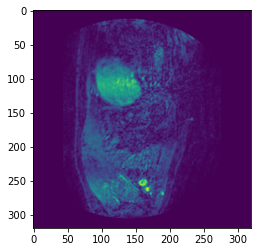

In [14]:
plt.imshow(ct_scans[2])

In [15]:
#Segunda imagem la_004.nii
j, c = load("imagesTr/la_004.nii")
#Mostrar as dimensões X, Y e Z e mostrar o tipo.
print (j.shape, j.dtype)

(320, 320, 110) float32


####Visualizando as imagens .NII com a biblioteca SimpleITK

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Anaconda3\envs\tensorflowgpu\lib\site-packages\IPython\core\interactiveshell.py", line 3441, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-8-a87626c9899f>", line 1, in <module>
    ct_scans = sitk.GetArrayFromImage(sitk.ReadImage("la_003.nii", sitk.sitkFloat32))
  File "C:\Anaconda3\envs\tensorflowgpu\lib\site-packages\SimpleITK\extra.py", line 346, in ReadImage
    return reader.Execute()
  File "C:\Anaconda3\envs\tensorflowgpu\lib\site-packages\SimpleITK\SimpleITK.py", line 8015, in Execute
    return _SimpleITK.ImageFileReader_Execute(self)
RuntimeError: Exception thrown in SimpleITK ImageFileReader_Execute: D:\a\1\sitk\Code\IO\src\sitkImageReaderBase.cxx:97:
sitk::ERROR: The file "la_003.nii" does not exist.

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Anaconda3\envs\tensorflowgpu\lib\site-packages\IPython\core\interactivesh

In [16]:
plt.figure(figsize=(20,16))

<Figure size 1440x1152 with 0 Axes>

<Figure size 1440x1152 with 0 Axes>

In [17]:
plt.gray()

<Figure size 432x288 with 0 Axes>

In [18]:
plt.subplots_adjust(0,0,1,1,0.01,0.01)

<Figure size 432x288 with 0 Axes>

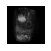

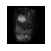

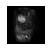

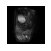

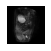

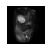

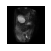

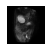

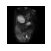

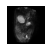

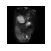

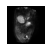

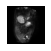

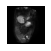

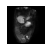

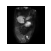

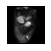

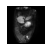

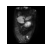

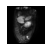

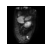

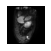

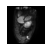

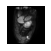

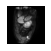

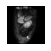

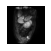

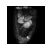

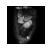

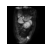

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Anaconda3\envs\tensorflowgpu\lib\site-packages\IPython\core\interactiveshell.py", line 3441, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-19-1288a5886389>", line 3, in <module>
    plt.subplot(5,6,i+1), plt.imshow(ct_scans[i]), plt.axis('off')
  File "C:\Anaconda3\envs\tensorflowgpu\lib\site-packages\matplotlib\pyplot.py", line 1272, in subplot
    key = SubplotSpec._from_subplot_args(fig, args)
  File "C:\Anaconda3\envs\tensorflowgpu\lib\site-packages\matplotlib\gridspec.py", line 654, in _from_subplot_args
    f"num must be 1 <= num <= {rows*cols}, not {num}")
ValueError: num must be 1 <= num <= 30, not 31

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Anaconda3\envs\tensorflowgpu\lib\site-packages\IPython\core\interactiveshell.py", line 2061, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'ValueError' ob

<Figure size 432x288 with 0 Axes>

In [ ]:
#Mostrando a imagem da ressonância magnética 3D em diferentes ângulos.
for i in range(ct_scans.shape[0]):
    plt.subplot(5,6,i+1), plt.imshow(ct_scans[i]), plt.axis('off')
    plt.show()

####Criando o DataFrame

####Treinando os dados das imagens